In [1]:
from sklearn.datasets import load_iris
import pandas as pd

Load and View the Iris Dataset

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

print(data.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


Apply K-Means Clustering\
It will cluster the data into 3 groups.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

data['cluster'] = kmeans.labels_

print(data.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  


Visualize Clusters Using PCA\
Reduce the 4D feature space into 2D using PCA and plot the clusters.

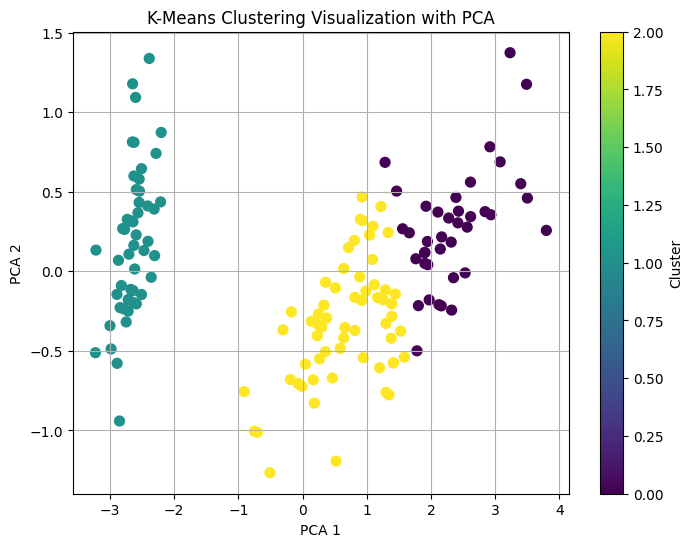

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.iloc[:, :4]) 

data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['cluster'], cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Compare with True Labels\
To see how well K-Means performed, we’ll plot the same PCA but color points by the actual species labels from the dataset.

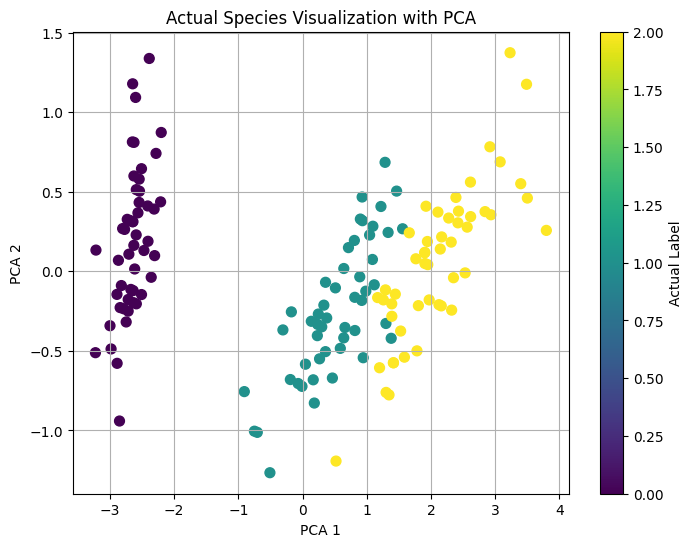

In [5]:
data['target'] = iris.target

plt.figure(figsize=(8, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['target'], cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Actual Species Visualization with PCA')
plt.colorbar(label='Actual Label')
plt.grid(True)
plt.show()


- The clustering clearly identified Setosa as a separate group.

- Some overlap existed between Versicolor and Virginica, which is common due to their similar feature values.

- PCA helped in visualizing the clusters in a human-understandable 2D space.